In [13]:
from stok.emulator import Emulator, StateModel
from stok.strategies.moving_average import MovingAverageStrategy
from stok.portfolio import Portfolio
import pandas as pd

initial_state = StateModel(portfolio=Portfolio(), available_funds=10000)
days = pd.read_csv("../goog.csv", index_col="Date", parse_dates=True)
strategy = MovingAverageStrategy(fund_allocation_proportion=0.2, short_term_window=5, long_term_window=30, initial_holding_days=30)
e = Emulator(initial_state=initial_state, strategy=strategy)
e.run(days)

In [16]:
e._portfolio_history.loc[:, ['quantity', 'unit_price', 'holding_value']] = e._portfolio_history.loc[:, ['quantity', 'unit_price', 'holding_value']].fillna(0)
wallet_and_portfolio = e._wallet_history.merge(e._portfolio_history, left_index=True, right_index=True)
wallet_and_portfolio["total_value"] = wallet_and_portfolio.available_funds + wallet_and_portfolio.holding_value

<Axes: >

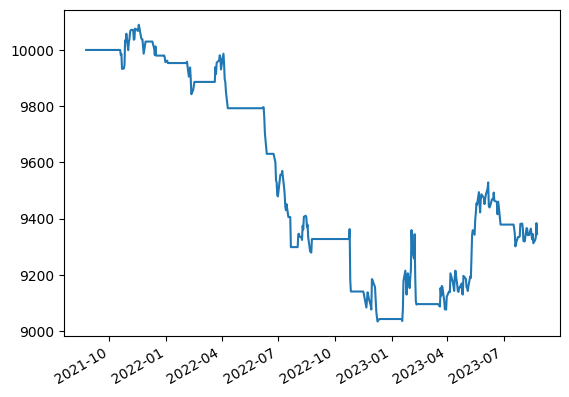

In [17]:
wallet_and_portfolio.total_value.plot()